In [5]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Постройте графики зависимостей target (Y) от признаков (X) как единый plot с использованием команды plt.subplot

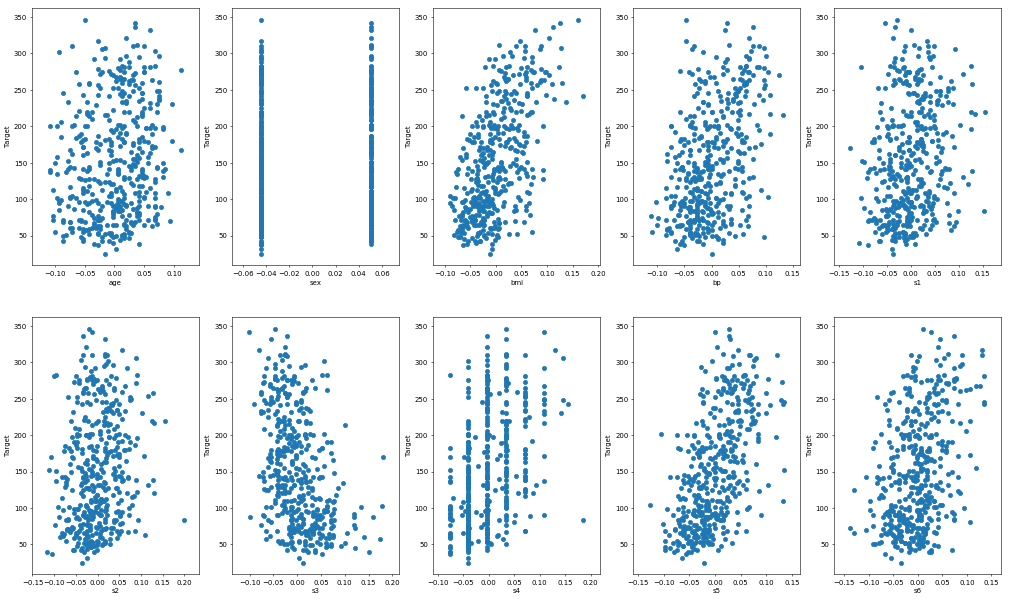

In [6]:
data = datasets.load_diabetes() 
Y, X = data['target'], data['data'].T
features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 
plt.figure(figsize=(25,15),dpi=50)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.scatter(X[i],Y)
    plt.xlabel(features[i])
    plt.ylabel('Target')

## 2. Линейные модели

[949.43526038 152.13348416]
0.3439237602253803


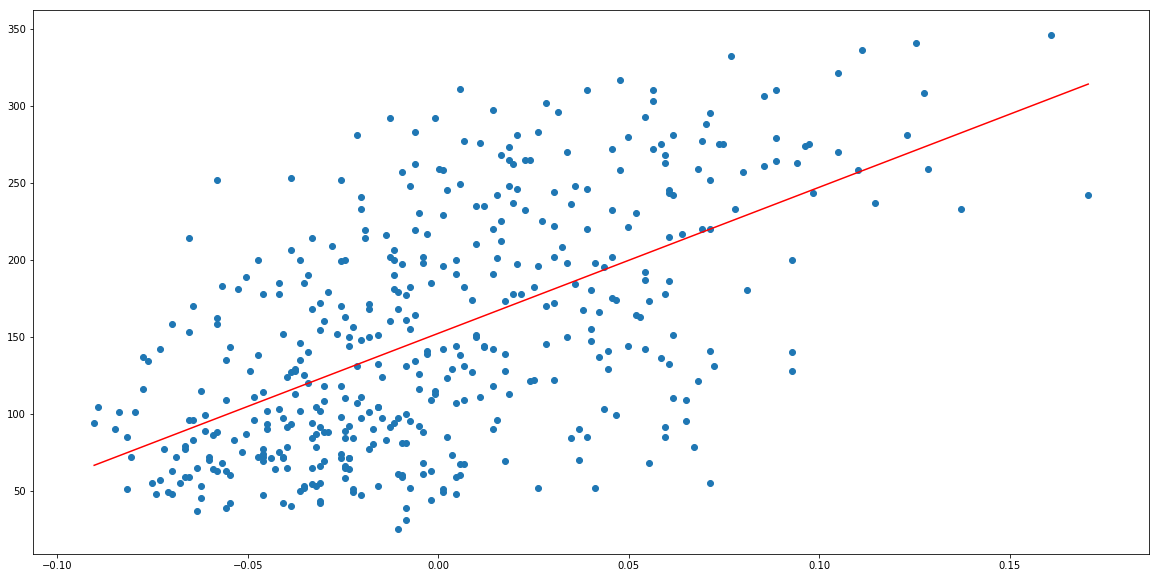

In [7]:
from sklearn import linear_model

feature = 2 # номер признака

reg = linear_model.LinearRegression(fit_intercept=False)#Если установлено False
#перехват не будет использоваться в расчетах (например, ожидается, что данные уже центрированы)
reg.fit([[x, 1] for x in X[feature]], Y) # обучим регрессию k*x + b*1, метод осуществит подбор коэффциентов k и b
# x-массив, обучающие данне
print(reg.coef_) # вывести коэффициенты
print(reg.score([[x, 1] for x in X[feature]], Y)) # вывести score

points = np.linspace(X[feature].min(), X[feature].max(), 100) # вы берем значения для предсказания
target = [np.sum(reg.coef_*[x, 1]) for x in points] # предсказания модели

plt.figure(figsize=(20, 10))
plt.scatter(X[feature], Y)
plt.plot(points, target, c='r')
plt.show()

## 3. Постройте полиномиальную модель 4 степени с использованием второго признака для предсказания Y. Полином выглядит так: ax^4 + bx^3 + ... + b = Y

[114576.32206995 -25895.11668061    412.54705785   1055.27334075
    151.05466919]
0.3455949866318273


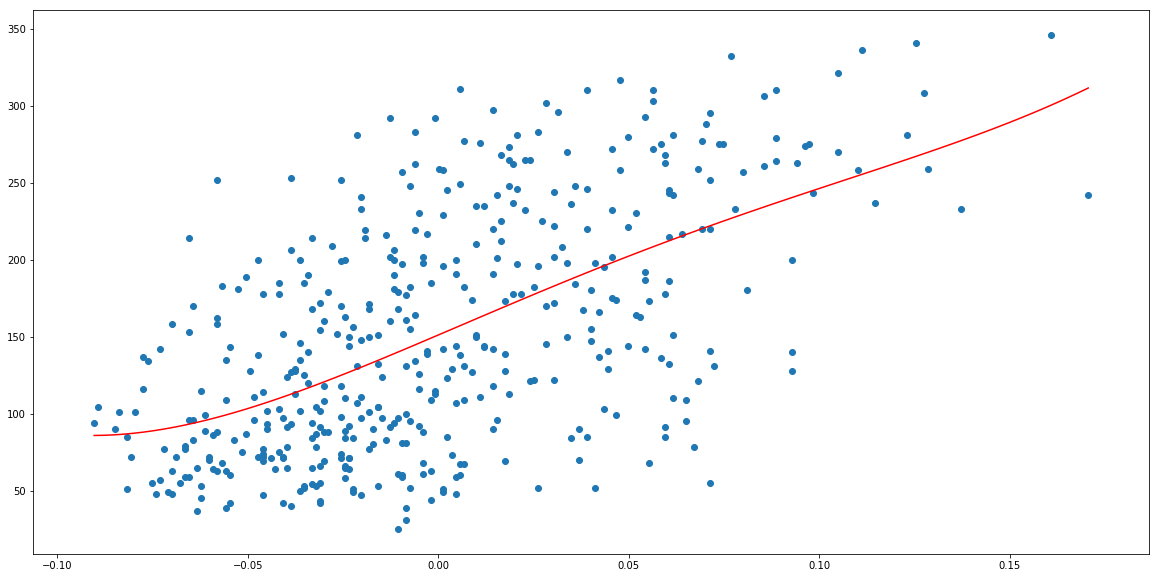

In [8]:
feature = 2

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit([[x**4,x**3,x**2, x, 1] for x in X[feature]], Y) # обучим регрессию ax^4 + bx^3 + ... + b, метод осуществит подбор коэффциентов k и b
print(reg.coef_) # вывести коэффициенты
print(reg.score([[x**4,x**3,x**2, x, 1] for x in X[feature]], Y)) # вывести score

points = np.linspace(X[feature].min(), X[feature].max(), 100) # выберем значения для предсказания
n=4
target = [np.sum(reg.coef_*[x**4,x**3,x**2, x, 1]) for x in points] # предсказания модели

plt.figure(figsize=(20, 10))
plt.scatter(X[feature], Y)
plt.plot(points, target, c='r')
plt.show()

## 4. Постройте полиномиальную модель с использованием трех любых признаков и выведите метрику MAE (Mean Absolute Error)

In [9]:
from sklearn.metrics import mean_absolute_error 

feature = [] 
for i in range(len(X[0])): 
    ft = [X[0][i], X[1][i], X[2][i]]  
    feature.append(ft) 

reg = linear_model.LinearRegression(fit_intercept=False) 
reg.fit([[x[0]**3, x[1]**2, x[2], 1] for x in feature], Y) 
print(reg.coef_)
print(reg.score([[x[0]**3, x[1]**2, x[2], 1] for x in feature], Y)) 

target = [np.sum(reg.coef_*[x[0]**3, x[1]**2, x[2], 1]) for x in feature] 

MAE = mean_absolute_error(Y, target) 
print('MAE:', MAE)

[ 7173.60357791 -3222.40176211   941.95713411   159.6020002 ]
0.344690426566883
MAE: 51.873819526127726


## 5. SVM и tree модели. С использованием метода svm.SVR и tree.DecisionTreeRegressor постройте модели с использованием метода опорных векторов и деревьев принятия решений. Выведите среднее значение вектора Y и MAE построенных моделей. Для обучения и тестирования независимые выборки.

In [14]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X.T, Y, test_size=0.4, random_state=0) 
# Ваш код
svm_poly_reg = SVR(kernel="poly", gamma='auto', C=1, epsilon=0.1).fit(train_x, train_y)
print(svm_poly_reg.score(test_x, test_y))
vecY = svm_poly_reg.predict(test_x)
print('среднее значение вектора Y', np.mean(vecY))
MAE_svr = 0
for i in range(0, len(test_y)):
    MAE_svr = MAE_svr + (test_y[i] - vecY[i])
MAE_svr = MAE_svr/len(test_y)
print('среднее значение MAE',MAE_svr)

-0.022389017257715693
среднее значение вектора Y 140.90000001910084
среднее значение MAE 10.862711845305919


In [22]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0).fit(train_x, train_y)
print(regressor.score(test_x, test_y))
__Y_tree = regressor.predict(test_x)
print('среднее значение вектора Y',np.mean(__Y_tree))
MAE_svr_tree = 0
for i in range(0, len(test_y)):
    MAE_svr_tree = MAE_svr_tree + (test_y[i] - __Y_tree[i])
MAE_svr_tree = MAE_svr_tree/len(test_y)
print('среднее значение MAE_tree',MAE_svr_tree)

-0.20631475716292158
среднее значение вектора Y 154.31638418079095
среднее значение MAE_tree -2.553672316384181


## 6. Используйте 5-fold кросс-валидацию для обучения любой понравившейся Вам модели (https://scikit-learn.org/stable/modules/cross_validation.html). Выведите метрики тестов для каждого получившегося набора (должно получится 5 независимых друг от друга метрик).

In [24]:
from sklearn.model_selection import cross_val_score 
from sklearn import metrics
cvs = cross_val_score(regressor, X.T, Y, cv=5, scoring='neg_mean_absolute_error')
cvs

array([-62.51685393, -66.79775281, -62.31818182, -53.36363636,
       -68.36363636])